### Predict cycles per day per station

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

df = pd.read_csv('Data/final_merged_hire_weather_station.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_784\3402273239.py:10: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/final_merged_hire_weather_station.csv')


In [158]:
df.head()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time,station_id,...,current_dockcount,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events
0,431,SEA00298,985.935,CBD-06,PS-04,2014-10-13,1900-01-01 10:31:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
1,432,SEA00195,926.375,CBD-06,PS-04,2014-10-13,1900-01-01 10:32:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
2,433,SEA00486,883.831,CBD-06,PS-04,2014-10-13,1900-01-01 10:33:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
3,434,SEA00333,865.937,CBD-06,PS-04,2014-10-13,1900-01-01 10:34:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
4,435,SEA00202,923.923,CBD-06,PS-04,2014-10-13,1900-01-01 10:34:00,2014-10-13,1900-01-01 10:49:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain


In [159]:
df['date'] = pd.to_datetime(df['date'])  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228812 entries, 0 to 228811
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              228812 non-null  int64         
 1   bikeid               228812 non-null  object        
 2   tripduration         228812 non-null  float64       
 3   from_station_id      228812 non-null  object        
 4   to_station_id        228812 non-null  object        
 5   start_date           228812 non-null  object        
 6   start_time           228812 non-null  object        
 7   stop_date            228812 non-null  object        
 8   stop_time            228812 non-null  object        
 9   station_id           228812 non-null  object        
 10  name                 228812 non-null  object        
 11  lat                  228812 non-null  float64       
 12  long                 228812 non-null  float64       
 13  install_date  

In [160]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['install_date'] = pd.to_datetime(df['install_date']).dt.date

# Convert non-numeric values to NaN and then fill NaN with 0
df['max_gust_speed_mph'] = pd.to_numeric(df['max_gust_speed_mph'], errors='coerce').fillna(0)

# Convert the column to int64
df['max_gust_speed_mph'] = df['max_gust_speed_mph'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228812 entries, 0 to 228811
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              228812 non-null  int64  
 1   bikeid               228812 non-null  object 
 2   tripduration         228812 non-null  float64
 3   from_station_id      228812 non-null  object 
 4   to_station_id        228812 non-null  object 
 5   start_date           228812 non-null  object 
 6   start_time           228812 non-null  object 
 7   stop_date            228812 non-null  object 
 8   stop_time            228812 non-null  object 
 9   station_id           228812 non-null  object 
 10  name                 228812 non-null  object 
 11  lat                  228812 non-null  float64
 12  long                 228812 non-null  float64
 13  install_date         228812 non-null  object 
 14  current_dockcount    228812 non-null  int64  
 15  date             

In [161]:
df.head(3)

,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time,station_id,...,current_dockcount,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events
0,431,SEA00298,985.935,CBD-06,PS-04,2014-10-13,1900-01-01 10:31:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
1,432,SEA00195,926.375,CBD-06,PS-04,2014-10-13,1900-01-01 10:32:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain
2,433,SEA00486,883.831,CBD-06,PS-04,2014-10-13,1900-01-01 10:33:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,18,2014-10-13,71,62.0,54,13,4,21,0.0,Rain


In [162]:
df.groupby('events').count()
# replace NaN o is clear,
# rain is 1, 
# fog is 2, 
# fog, rain 3
# rain, thunderstorm, 4
# Snow 5

,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time,station_id,...,install_date,current_dockcount,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in
events,,,,,,,,,,,,,,,,,,,,,
Fog,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237,...,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237
"Fog , Rain",1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,...,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
Fog-Rain,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,...,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496
Rain,72219,72219,72219,72219,72219,72219,72219,72219,72219,72219,...,72219,72219,72219,72219,72219,72219,72219,72219,72219,72219
"Rain , Snow",55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
"Rain , Thunderstorm",1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,...,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314
Rain-Snow,247,247,247,247,247,247,247,247,247,247,...,247,247,247,247,247,247,247,247,247,247
Rain-Thunderstorm,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,...,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008
Snow,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [163]:
# Create a dictionary to map old values to new values
event_mapping = {
    'Fog': 'fog',
    'Fog , Rain': 'fog, rain',
    'Fog-Rain': 'fog, rain',
    'Rain': 'rain',
    'Rain , Snow': 'rain, snow',
    'Rain , Thunderstorm': 'rain, thunderstorm',
    'Rain-Snow': 'rain, snow',
    'Rain-Thunderstorm': 'rain, thunderstorm',
    'Snow': 'snow'
}

# Replace values in the 'events' column using the dictionary
df['events'] = df['events'].replace(event_mapping)

# Check the updated 'events' column
df.groupby('events').count()


,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time,station_id,...,install_date,current_dockcount,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in
events,,,,,,,,,,,,,,,,,,,,,
fog,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237,...,4237,4237,4237,4237,4237,4237,4237,4237,4237,4237
"fog, rain",3264,3264,3264,3264,3264,3264,3264,3264,3264,3264,...,3264,3264,3264,3264,3264,3264,3264,3264,3264,3264
rain,72219,72219,72219,72219,72219,72219,72219,72219,72219,72219,...,72219,72219,72219,72219,72219,72219,72219,72219,72219,72219
"rain, snow",302,302,302,302,302,302,302,302,302,302,...,302,302,302,302,302,302,302,302,302,302
"rain, thunderstorm",2322,2322,2322,2322,2322,2322,2322,2322,2322,2322,...,2322,2322,2322,2322,2322,2322,2322,2322,2322,2322
snow,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [164]:
# assumed an ordinal relationship for our categorical variable 'events' so we could assign a numerical value
event_ratings = {
    'fog': 1,
    'rain': 2,
    'snow': 3,
    'fog, rain': 4,
    'rain, snow': 5,
    'rain, thunderstorm': 6,
}

# Create the 'events rating' column by mapping the events to their ratings
df['events_rating'] = df['events'].map(event_ratings)

# Fill NaN values in the 'events rating' column with 0 if needed
df['events_rating'] = df['events_rating'].fillna(0)

df.head(3)

,trip_id,bikeid,tripduration,from_station_id,to_station_id,start_date,start_time,stop_date,stop_time,station_id,...,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events,events_rating
0,431,SEA00298,985.935,CBD-06,PS-04,2014-10-13,1900-01-01 10:31:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0
1,432,SEA00195,926.375,CBD-06,PS-04,2014-10-13,1900-01-01 10:32:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0
2,433,SEA00486,883.831,CBD-06,PS-04,2014-10-13,1900-01-01 10:33:00,2014-10-13,1900-01-01 10:48:00,CBD-06,...,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0


In [165]:
columns_to_keep = [
    'trip_id', 'bikeid', 'tripduration', 'station_id',
    'name', 'lat', 'long', 'current_dockcount', 'date',
    'max_temperature_f', 'mean_temperature_f', 'min_temperaturef',
    'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
    'precipitation_in', 'events', 'events_rating']

# Create a new DataFrame with the specified columns
df2 = df[columns_to_keep].copy()

# Display the new DataFrame, should have 57 stations

# Assuming 'df' is your DataFrame and 'events' is the column to be one-hot encoded
# df = pd.get_dummies(df, columns=['events'], drop_first=True)

df2.head(3)


,trip_id,bikeid,tripduration,station_id,name,lat,long,current_dockcount,date,max_temperature_f,mean_temperature_f,min_temperaturef,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events,events_rating
0,431,SEA00298,985.935,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,18,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0
1,432,SEA00195,926.375,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,18,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0
2,433,SEA00486,883.831,CBD-06,2nd Ave & Spring St,47.60595,-122.335768,18,2014-10-13,71,62.0,54,13,4,21,0.0,rain,2.0


In [166]:
df3 = df2.groupby(['date', 'station_id',
                   'name', 'lat', 'long',
                   'current_dockcount', 'max_temperature_f',
                   'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_in', 'events_rating']).size().reset_index(name='total_hires')
df3['name'] = df3['name'].astype(str)
le = LabelEncoder()
df3['name_encoded'] = le.fit_transform(df3['name'])
df3['name_encoded'].unique()
df3.head(3)

,date,station_id,name,lat,long,current_dockcount,max_temperature_f,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events_rating,total_hires,name_encoded
0,2014-10-13,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,71,13,4,21,0.0,2.0,10,10
1,2014-10-13,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16,71,13,4,21,0.0,2.0,6,9
2,2014-10-13,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16,71,13,4,21,0.0,2.0,13,11


array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'current_dockcount'}>],
       [<Axes: title={'center': 'max_temperature_f'}>,
        <Axes: title={'center': 'max_wind_speed_mph'}>,
        <Axes: title={'center': 'mean_wind_speed_mph'}>],
       [<Axes: title={'center': 'max_gust_speed_mph'}>,
        <Axes: title={'center': 'precipitation_in'}>,
        <Axes: title={'center': 'events_rating'}>],
       [<Axes: title={'center': 'total_hires'}>,
        <Axes: title={'center': 'name_encoded'}>, <Axes: >]], dtype=object)

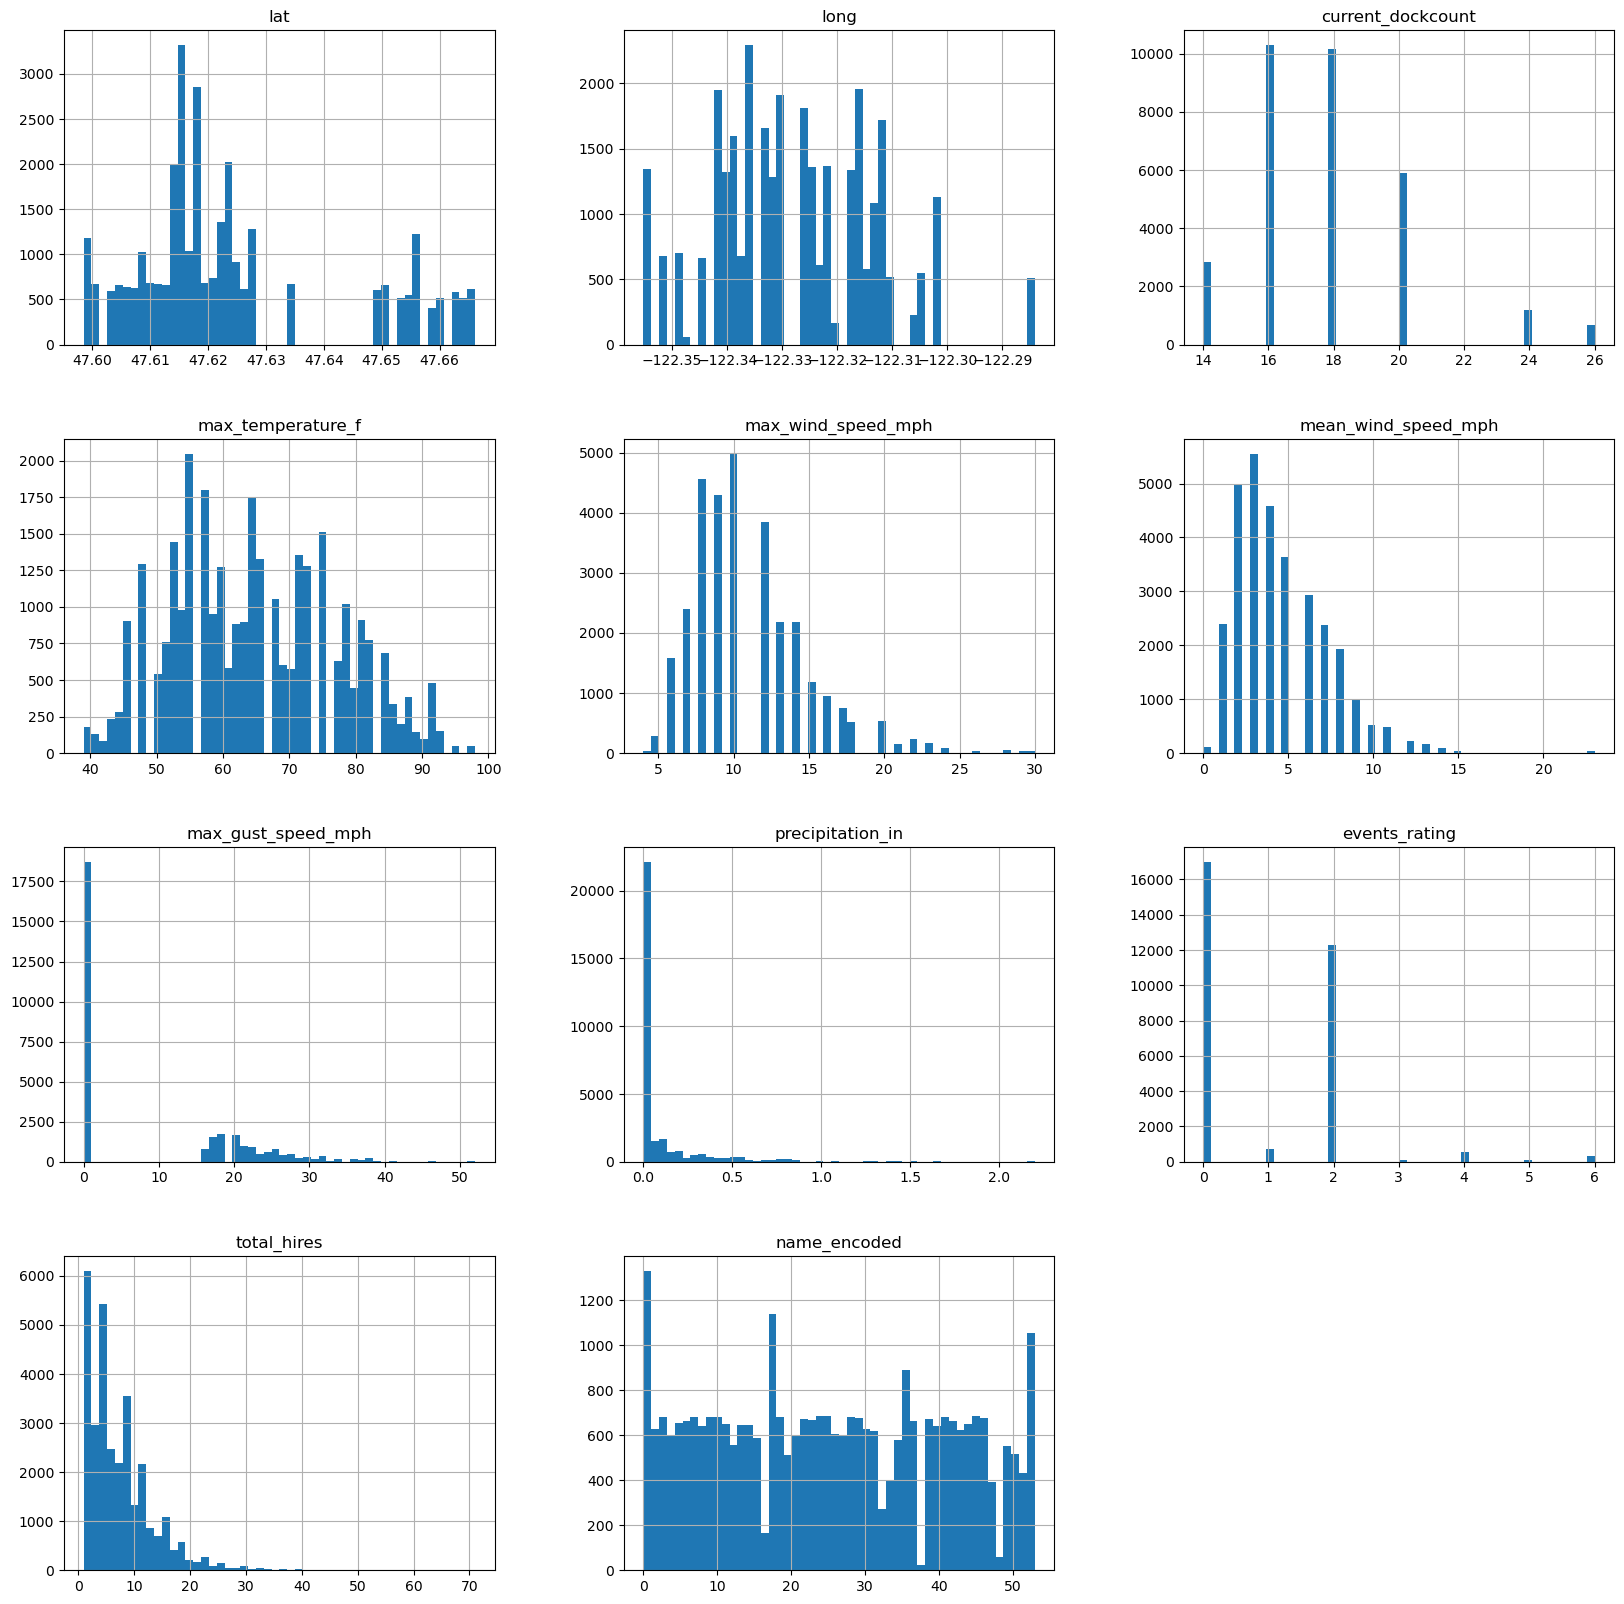

In [167]:
df3.hist(bins=50, figsize=(20,20))

C:\Users\Admin\AppData\Local\Temp\ipykernel_784\1599790241.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.8, ax=ax);


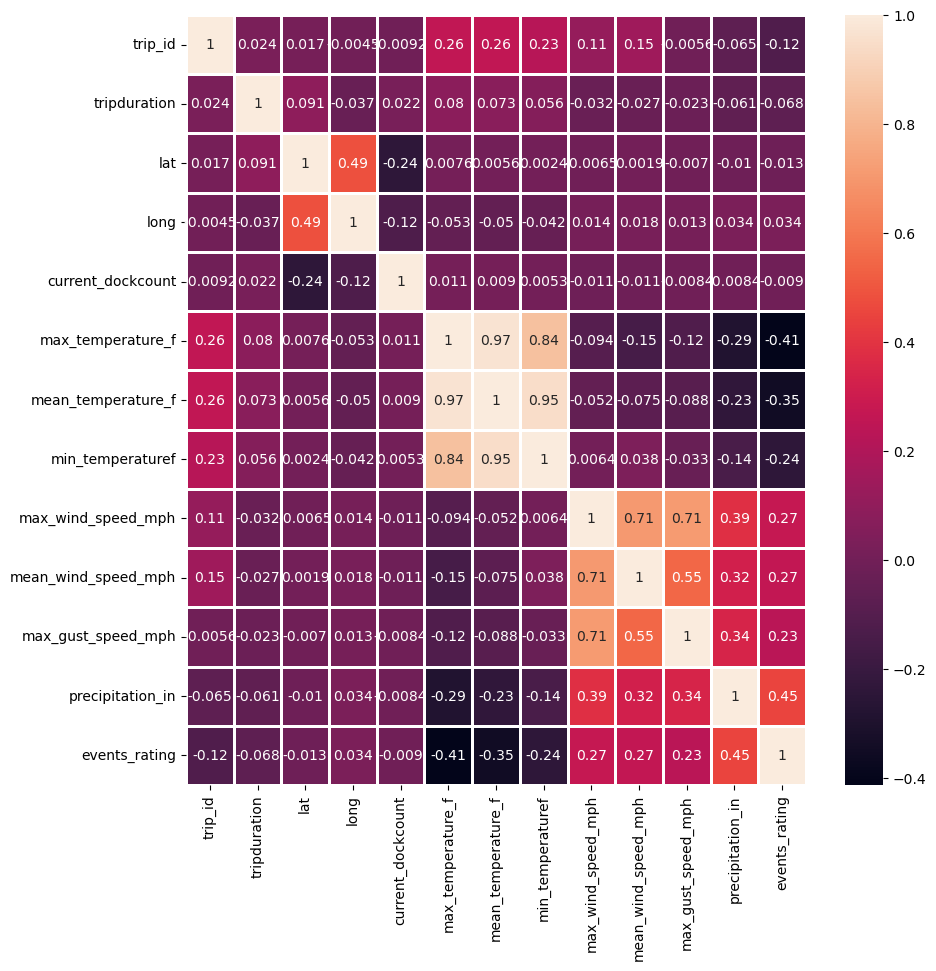

In [168]:
# Creating an axes on which to draw the heatmap
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.8, ax=ax);

In [169]:
df3.corr(method='pearson')['total_hires'].sort_values(ascending = False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_784\1359185638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr(method='pearson')['total_hires'].sort_values(ascending = False)


total_hires            1.000000
max_temperature_f      0.364728
current_dockcount      0.192863
name_encoded          -0.003228
max_gust_speed_mph    -0.107807
max_wind_speed_mph    -0.123048
mean_wind_speed_mph   -0.127700
precipitation_in      -0.202309
events_rating         -0.202951
lat                   -0.243525
long                  -0.275291
Name: total_hires, dtype: float64

In [170]:
feature_columns = ['lat', 'long', 'current_dockcount',
       'max_temperature_f', 'max_wind_speed_mph', 'mean_wind_speed_mph',
       'max_gust_speed_mph', 'precipitation_in', 'events_rating', 'name_encoded']

X = df3[feature_columns]
y = df3['total_hires']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


<Axes: >

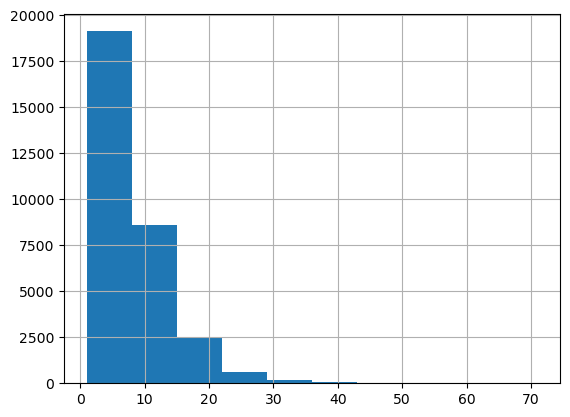

In [171]:
y.hist()

<Axes: >

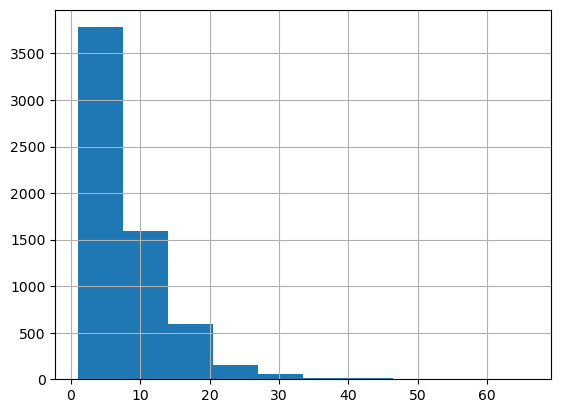

In [172]:
y_test.hist()

In [173]:
scaler = StandardScaler()
scaler_target = StandardScaler()

In [174]:
cols = list(X_train.columns)
cols

['lat',
 'long',
 'current_dockcount',
 'max_temperature_f',
 'max_wind_speed_mph',
 'mean_wind_speed_mph',
 'max_gust_speed_mph',
 'precipitation_in',
 'events_rating',
 'name_encoded']

In [175]:
X_train

,lat,long,current_dockcount,max_temperature_f,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events_rating,name_encoded
1308,47.600757,-122.332946,18,54,8,2,0,0.00,0.0,36
29486,47.598994,-122.329684,18,77,12,5,0,0.00,0.0,30
22409,47.654613,-122.304863,14,53,9,7,20,0.03,2.0,49
13481,47.613628,-122.337341,20,78,12,3,16,0.00,0.0,53
5784,47.619859,-122.330304,20,54,9,4,0,0.73,2.0,41
...,...,...,...,...,...,...,...,...,...,...
23452,47.598994,-122.329684,18,73,7,1,0,0.00,0.0,30
23775,47.607702,-122.341650,18,68,12,4,17,0.00,0.0,43
4367,47.620712,-122.312805,16,64,8,3,0,0.01,0.0,3
27098,47.615330,-122.311752,18,66,10,7,16,0.00,0.0,25


In [176]:
scaler.fit_transform(X_train)

array([[-1.28810931, -0.36107351,  0.10016612, ..., -0.43556991,
        -0.81717928,  0.69938588],
       [-1.38499137, -0.13465149,  0.10016612, ..., -0.43556991,
        -0.81717928,  0.31263359],
       [ 1.67143714,  1.58822432, -1.50300777, ..., -0.29609656,
         0.84984096,  1.53734917],
       ...,
       [-0.19152306,  1.03695404, -0.70142082, ..., -0.38907879,
        -0.81717928, -1.42775172],
       [-0.48727987,  1.1100449 ,  0.10016612, ..., -0.43556991,
        -0.81717928, -0.00965999],
       [ 1.62197948,  1.7757062 , -1.50300777, ..., -0.43556991,
        -0.81717928,  1.60180789]])

In [177]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test)

In [178]:
X_train

,lat,long,current_dockcount,max_temperature_f,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events_rating,name_encoded
1308,-1.288109,-0.361074,0.100166,-0.877398,-0.792560,-0.951389,-0.772428,-0.435570,-0.817179,0.699386
29486,-1.384991,-0.134651,0.100166,0.987001,0.256282,0.152871,-0.772428,-0.435570,-0.817179,0.312634
22409,1.671437,1.588224,-1.503008,-0.958459,-0.530349,0.889044,0.940671,-0.296097,0.849841,1.537349
13481,-0.580810,-0.666139,0.901753,1.068062,0.256282,-0.583302,0.598051,-0.435570,-0.817179,1.795184
5784,-0.238398,-0.177687,0.901753,-0.877398,-0.530349,-0.215216,-0.772428,2.958282,0.849841,1.021679
...,...,...,...,...,...,...,...,...,...,...
23452,-1.384991,-0.134651,0.100166,0.662758,-1.054770,-1.319475,-0.772428,-0.435570,-0.817179,0.312634
23775,-0.906461,-0.965236,0.100166,0.257453,0.256282,-0.215216,0.683706,-0.435570,-0.817179,1.150597
4367,-0.191523,1.036954,-0.701421,-0.066790,-0.792560,-0.583302,-0.772428,-0.389079,-0.817179,-1.427752
27098,-0.487280,1.110045,0.100166,0.095332,-0.268139,0.889044,0.598051,-0.435570,-0.817179,-0.009660


In [179]:

# Fitting the scaler on the training target and applying it to both the training and test data
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))


In [180]:
y_train#.reshape(-1)

array([[ 0.45049802],
       [ 0.45049802],
       [-0.89734932],
       ...,
       [ 1.29290261],
       [ 2.1353072 ],
       [-0.39190657]])

In [181]:
X_train.describe()

,lat,long,current_dockcount,max_temperature_f,max_wind_speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_in,events_rating,name_encoded
count,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04,2.485600e+04
mean,-2.484570e-14,6.762565e-13,6.592016e-16,-9.747951e-17,-1.151316e-16,4.907922e-17,2.687118e-17,-7.789785e-18,-7.975596e-17,-5.352797e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.412798e+00,-1.907851e+00,-1.503008e+00,-2.093310e+00,-1.841401e+00,-1.687562e+00,-7.724278e-01,-4.355699e-01,-8.171793e-01,-1.621128e+00
25%,-5.808098e-01,-7.259725e-01,-7.014208e-01,-7.963370e-01,-7.925598e-01,-5.833023e-01,-7.724278e-01,-4.355699e-01,-8.171793e-01,-9.120820e-01
50%,-3.103863e-01,-1.346515e-01,1.001661e-01,-6.678972e-02,-2.681390e-01,-2.152157e-01,-7.724278e-01,-4.355699e-01,-8.171793e-01,-9.659990e-03
75%,1.893559e-01,7.588895e-01,1.001661e-01,8.248791e-01,5.184921e-01,5.209574e-01,9.406706e-01,-1.101321e-01,8.498410e-01,8.927620e-01
max,2.305155e+00,3.028107e+00,3.306514e+00,2.689278e+00,4.976069e+00,6.778429e+00,3.681628e+00,9.792476e+00,4.183881e+00,1.795184e+00


In [182]:
# oobserving for the target
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 -6.803555323097194e-17
1.0193401462816694 0.03225105437979683


# building our model

In [183]:
X_train.columns

Index(['lat', 'long', 'current_dockcount', 'max_temperature_f',
       'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_in', 'events_rating', 'name_encoded'],
      dtype='object')

In [184]:
# columns = ['lat', 'long', 'current_dockcount',
#        'max_temperature_f', 'max_wind_speed_mph', 'mean_wind_speed_mph',
#        'max_gust_speed_mph', 'precipitation_in', 'events_rating', 'name_encoded']
cols = ['max_temperature_f']

In [185]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept = False)

regressor.fit(X_train[cols], y_train)

y_pred = regressor.predict(X_test[cols])

# # Step e (continued): Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [186]:
y_pred

array([[-0.22921197],
       [-0.17061955],
       [-0.28780439],
       ...,
       [-0.22921197],
       [ 0.2395274 ],
       [-0.43428545]])

In [187]:
regressor.coef_

array([[0.36141032]])

In [188]:
regressor.intercept_

0.0

In [189]:
regressor.feature_names_in_

array(['max_temperature_f'], dtype=object)

# Plotting model against Training Data

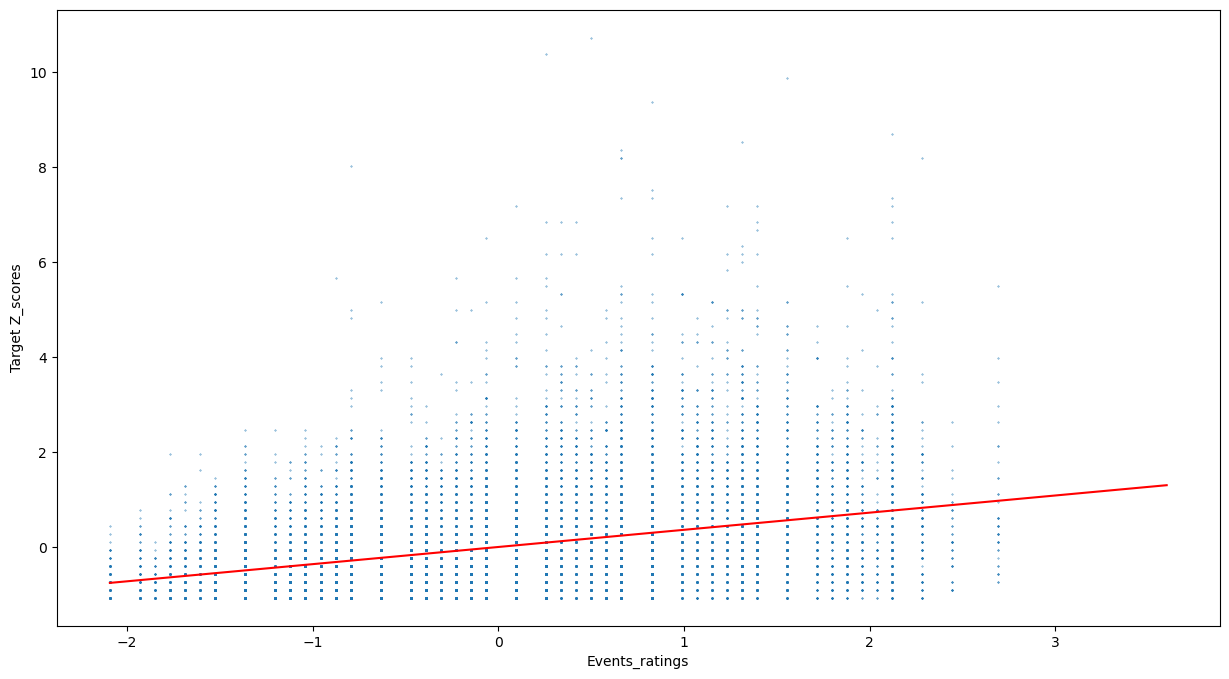

In [190]:
plt.figure(figsize=(15, 8))
# Plotting MedInc against the Target
plt.scatter(X_train[cols], y_train, s=0.1)


# Selecting x values to input into the model
# Started at the min value of MedInc that we have, 
# the upper limit was found by experimenitng so as not to exceed the y value
# in this case the linear model is very poor at predicting anything over a standardised x value of over 3
x = np.linspace(X_train[cols].min(), 3.6, 100)

# Using the gradient and intercept from the model to plot 
# The intercept is zero but it is added for completeness
# y = m              *x+ c
y = (regressor.coef_)*x+(regressor.intercept_)

# # Plotting the linear model
plt.plot(x, y, '-r')

# # Adding labels to each axis
plt.xlabel('Events_ratings')
plt.ylabel('Target Z_scores')

# calling the plot
plt.show()

# Plotting model against Test Data

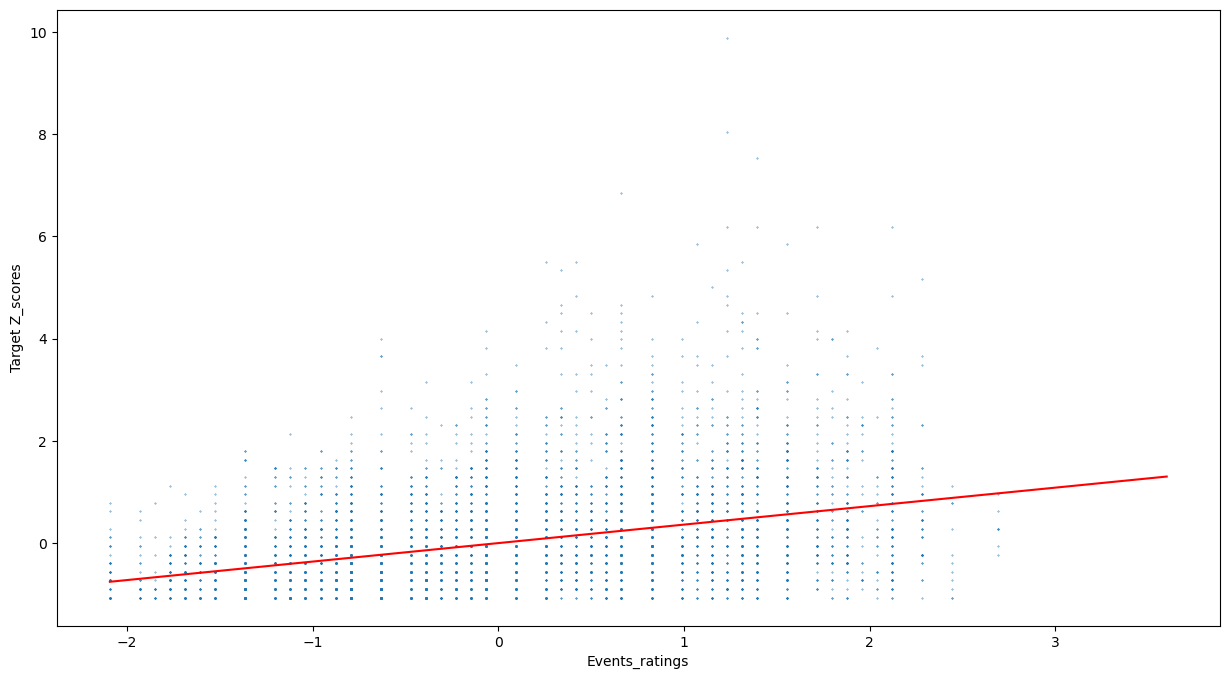

In [191]:
# Same as above
# notice the difference in the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(X_test[cols], y_test, s=0.1)
x = np.linspace(X_train[cols].min(),3.6,100)
y = (regressor.coef_)*x+(regressor.intercept_)

plt.plot(x, y, '-r', label='Model')
plt.xlabel('Events_ratings')
plt.ylabel('Target Z_scores')
plt.show()

#### Assesing the model

Target variable was scaled - so descaling it now to measure the RMSE (Root Mean Square Error)
If left scaled - units won't make sense - descaling enables the error output to be in the same units as original data

In [192]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

Now to measure the errors - these errors are the differences from our predicted 
target values to the actual target values of the test set

In [193]:
# Import the necessary packages
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [194]:
# Viewing these results
print('MAE = ', mae)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R^2 = ', r2)

MAE =  4.047782554846832
MSE =  31.429957066651227
RMSE =  5.6062426870990185
R^2 =  0.14136819800555966


Mean Absolute Error (MAE):

Interpretation: MAE represents the average absolute difference between the predicted and actual values. It gives a measure of the average magnitude of errors.
Your MAE of approximately 4.05 suggests that, on average, your predictions are off by about 4 bikes.
Mean Squared Error (MSE):

Interpretation: MSE measures the average squared difference between the predicted and actual values. It amplifies the impact of larger errors.
Your MSE of approximately 31.43 indicates the average squared difference between predicted and actual values.
Root Mean Squared Error (RMSE):

Interpretation: RMSE is the square root of MSE and provides a more interpretable measure. It represents the standard deviation of the errors.
Your RMSE of approximately 5.61 suggests that, on average, your predictions deviate by about 5.61 bikes.
R-squared (R²):

Interpretation: R² measures the proportion of the variance in the dependent variable (bikes hired) that is predictable from the independent variables (features) in the model. It ranges from 0 to 1, where 1 indicates a perfect fit.
Your R² of approximately 0.14 suggests that your model explains about 14% of the variance in the number of bikes hired. This indicates that there might be room for improvement.

In [195]:
# We can view the coefficients of the features
regressor.coef_

array([[0.36141032]])

In [196]:
# The feature names included
regressor.feature_names_in_

array(['max_temperature_f'], dtype=object)

# Multi-Linear Regression

We will now add in another variable and see its impact on the errors

In [197]:
X_train.columns

Index(['lat', 'long', 'current_dockcount', 'max_temperature_f',
       'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
       'precipitation_in', 'events_rating', 'name_encoded'],
      dtype='object')

In [198]:
cols = ['max_wind_speed_mph', 'mean_wind_speed_mph', 'max_temperature_f']

In [199]:
# call the method
regressor = LinearRegression( fit_intercept = False)

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4))

MAE =  4.0143
MSE =  31.0393
RMSE =  5.5713
R^2 =  0.152


In [200]:
regressor.score(X_test[cols],y_test)

0.15204007935713226

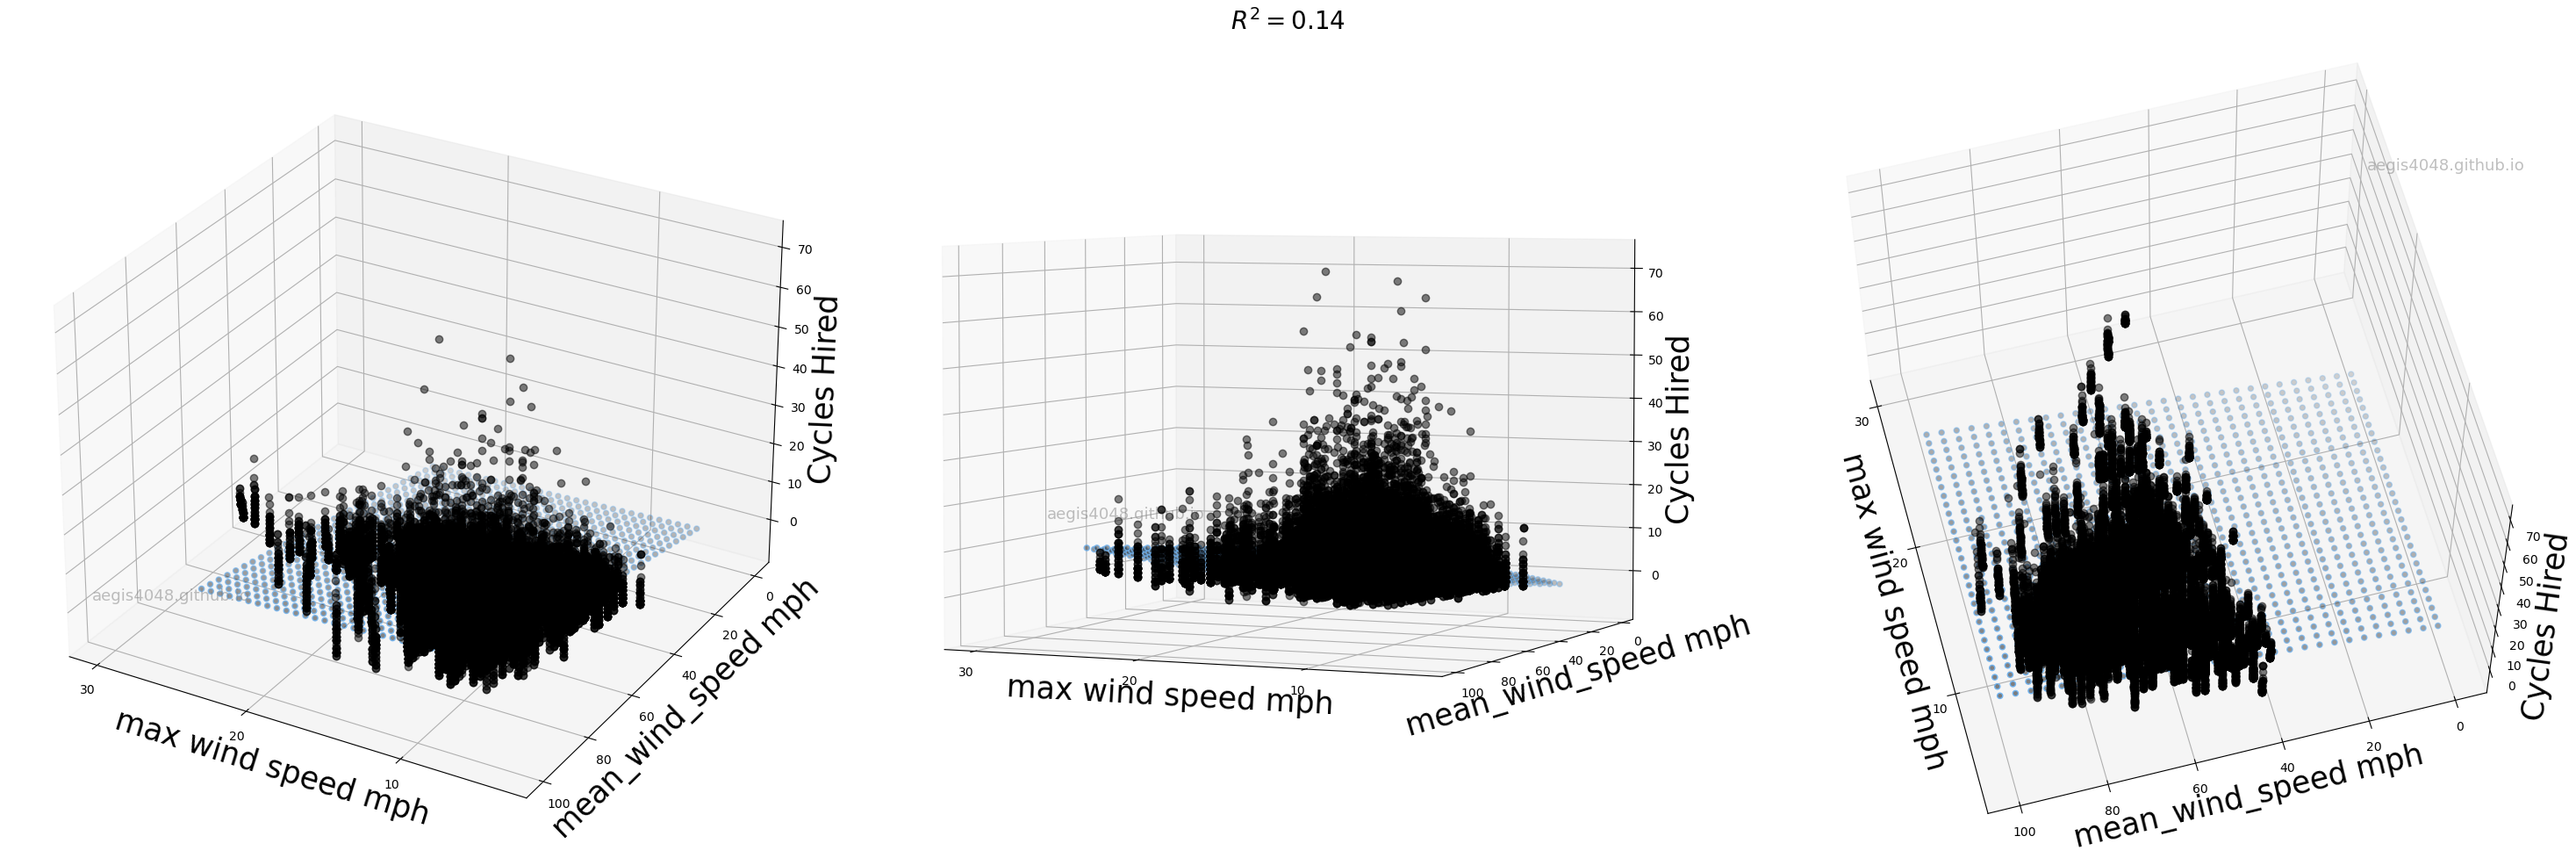

In [231]:

from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D



X = df3[['max_wind_speed_mph', 'max_temperature_f']].values.reshape(-1,2)
Y = df3['total_hires']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)  
y_pred = np.linspace(0, 100, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0.5), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('max wind speed mph', fontsize=25)
    ax.set_ylabel('mean_wind_speed mph', fontsize=25)
    ax.set_zlabel('Cycles Hired', fontsize=25)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

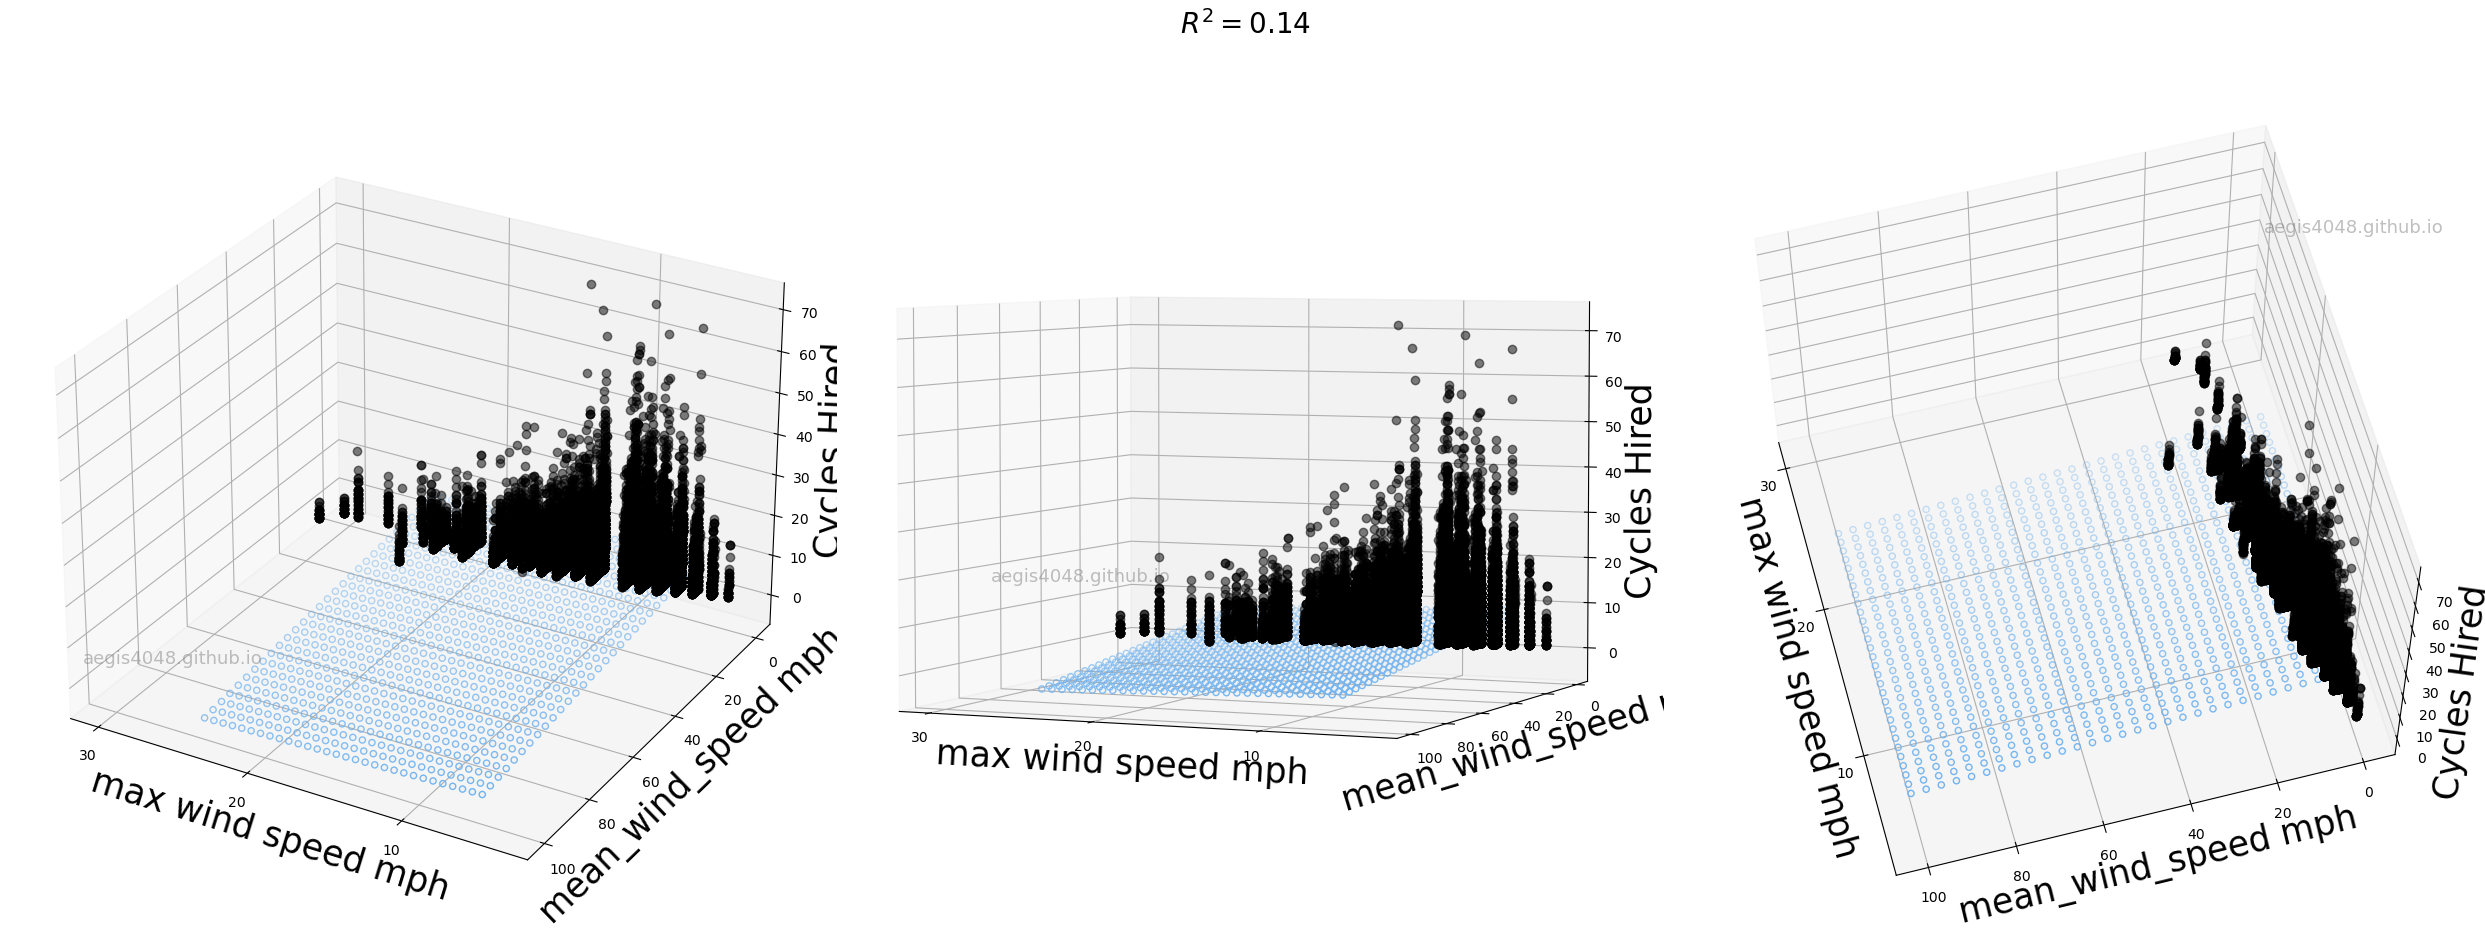

In [239]:


X = df3[['max_wind_speed_mph', 'mean_wind_speed_mph', 'max_temperature_f']].values.reshape(-1, 3)
Y = df3['total_hires']

# Prepare model data point for visualization
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)
y_pred = np.linspace(0, 100, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten(), np.ones_like(xx_pred.flatten()) * np.mean(X[:, 2])]).T  # Include values for all three features

# Train
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate
r2 = model.score(X, Y)

# Plot
plt.style.use('default')
fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0, 0, 0, 0.01), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('max wind speed mph', fontsize=25)
    ax.set_ylabel('mean_wind_speed mph', fontsize=25)
    ax.set_zlabel('Cycles Hired', fontsize=25)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
plt.show()


In [205]:
# def perform_linear_regression(X_train, y_train, X_test, y_test, cols, scaler_target):
#     # Initialize the linear regression model
#     regressor = LinearRegression(fit_intercept=False)
    
#     # Fit the model
#     regressor.fit(X_train[cols], y_train)

#     # Make predictions on the test set
#     y_pred = regressor.predict(X_test[cols])

#     # Reverse the transformation for meaningful results
#     y_true = scaler_target.inverse_transform(y_test)
#     y_pred = scaler_target.inverse_transform(y_pred)

#     # Calculate the evaluation metrics
#     mae = mean_absolute_error(y_true, y_pred)
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_true, y_pred)

#     # Display the results
#     print('MAE = ', mae.round(4))
#     print('MSE = ', mse.round(4))
#     print('RMSE = ', rmse.round(4))
#     print('R^2 = ', r2.round(4))

#     # Return the evaluation metrics
#     return mae, mse, rmse, r2

# # Example usage:
# selected_features = ['max_temperature_f', 'max_wind_speed_mph', 'precipitation_in']
# evaluation_results = perform_linear_regression(X_train, y_train, X_test, y_test, selected_features, scaler_target)


MAE =  3.9912
MSE =  30.8275
RMSE =  5.5523
R^2 =  0.1578
